# DL Final Project

In [1]:
from models.transunet import TransUnet
from data_processing.data_parser import DataReader
from experiments.config import get_transunet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("./sampleData/trainInputsSample224.npy")
y = np.load("./sampleData/trainOutputsSample224.npy")
# X_train = X[np.newaxis, :int(len(X)*.7), :, :, :].astype("float32")
# y_train = y[np.newaxis, :int(len(y)*.7), :, :, :].astype("float32")
# X_val = X[np.newaxis, int(len(X)*.7):, :, :, :].astype("float32")
# y_val = y[np.newaxis, int(len(y)*.7):, :, :, :].astype("float32")
X_train = X[:int(len(X)*.7), :, :, :].astype("float32")
y_train = y[:int(len(y)*.7), :, :, :].astype("float32")
X_val = X[int(len(X)*.7):, :, :, :].astype("float32")
y_val = y[int(len(y)*.7):, :, :, :].astype("float32")
X_test = np.load("./sampleData/testInputsSample224.npy")
y_test = np.load("./sampleData/testOutputsSample224.npy")

In [3]:
## Train Model
config = get_transunet()
# config.image_size = 512
# config.decoder_channels = [512, 256, 128, 64]
# config.n_skip = 6
config.image_size = 224
config.filters = 3
print(config.image_size)
transunet = TransUnet(config)
transunet.compile()
#history = transunet.train_validate(training_dataset, validation_dataset, save_path, epochs=150)

224


In [4]:
history = transunet.model.fit(x=X_train.astype("float32"), y=y_train.astype("float32"), validation_data=(X_val.astype("float32"), y_val.astype("float32")), epochs=5, batch_size=20, verbose=1)

Epoch 1/5
1/1 [==============================] - 120s 120s/step - loss: 116.5021 - val_loss: 694.9924
Epoch 2/5
1/1 [==============================] - 48s 48s/step - loss: 116.7663 - val_loss: 2770417.2500
Epoch 3/5
1/1 [==============================] - 44s 44s/step - loss: 129.1012 - val_loss: 63227.1367
Epoch 4/5
1/1 [==============================] - 45s 45s/step - loss: 152.6730 - val_loss: 1293473.7500
Epoch 5/5
1/1 [==============================] - 42s 42s/step - loss: 235.2835 - val_loss: 5900813.5000


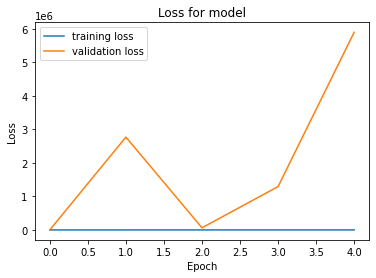

In [5]:
plt.figure()
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title(f"Loss for model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
from scipy.spatial import distance

# Compute dice coefficient
def diceCoef(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    return distance.dice(y_true, y_pred)

y_preds = transunet.model.predict(X_test)

total = 0
for i in list(range(len(y_preds))):
    total = total + diceCoef(y_test[i], y_preds[i])
print("Average Dice Coefficient: ", total/len(y_preds))


Average Dice Coefficient:  -230.84164570556348


# Code below uses train_validate(). Doe same thing as code above, but also computes dice coefficient automatically. Was not able to get it to work

In [73]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).repeat(10)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).repeat(10)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).repeat(10)

In [76]:
transunet.train_validate(training_dataset=train_dataset, validation_dataset=val_dataset, save_path="./", validation_samples=5, epochs=1, batch_size=100, show_history=True)

10/22 [============>.................] - ETA: 6:21 - loss: 4475686.5000

KeyboardInterrupt: 

In [9]:
print(type(y_preds))
print(y_preds.shape)

<class 'numpy.ndarray'>
(15, 224, 224, 3)
